# Big Data Project

# Visualization of sample pair

---


# 1. Importing required modules

In [1]:
import os
import pandas as pd
from statsmodels.tsa.stattools import coint

# 2. Get dataset of choice

## 2.1. Choose symbols and number of pair to visualize

In [2]:
symbol1 = "HEROMOTOCO"
symbol2 = "BAJAJ-AUTO"
dataset_num = 1

## 2.2. Get chosen dataset

In [3]:
pair_df = pd.read_csv(f"./Storage/pairs_profits/{symbol1}-{symbol2}-{dataset_num}.csv")
pair_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders,Flipped_Orders,HEROMOTOCO_shares,BAJAJ-AUTO_shares,HEROMOTOCO_profits,BAJAJ-AUTO_profits
0,2017-02-15,3097.850098,2789.600098,308.250000,-1.873277,LONG,SHORT,6.0,7.0,1050.000000,-302.399658
1,2017-02-17,3087.199951,2778.899902,308.300049,-1.872460,LONG,SHORT,6.0,7.0,1113.900879,-377.301025
2,2017-02-20,3102.100098,2791.500000,310.600098,-1.834918,LONG,SHORT,6.0,7.0,1024.500000,-289.100342
3,2017-02-21,3125.800049,2799.250000,326.550049,-1.574579,LONG,SHORT,6.0,7.0,882.300293,-234.850342
4,2017-03-03,3272.850098,2832.800049,440.050049,0.277996,GET_OUT_OF_POSITION,GET_OUT_OF_POSITION,6.0,7.0,0.000000,0.000000


---

# 3. Displaying correlation

In [4]:
corr_df = pair_df.drop(columns=["Date", "Spread", "zscore", "Orders", "Flipped_Orders", f"{symbol1}_shares", f"{symbol2}_shares", f"{symbol1}_profits", f"{symbol2}_profits"])
corr_df.head()

,HEROMOTOCO_Close,BAJAJ-AUTO_Close
0,3097.850098,2789.600098
1,3087.199951,2778.899902
2,3102.100098,2791.500000
3,3125.800049,2799.250000
4,3272.850098,2832.800049


In [5]:
correlation_matrix = corr_df.corr()
correlation_matrix.style.background_gradient()

,HEROMOTOCO_Close,BAJAJ-AUTO_Close
HEROMOTOCO_Close,1.000000,0.893185
BAJAJ-AUTO_Close,0.893185,1.000000


---

# 4. Visualizing the close prices of the pair

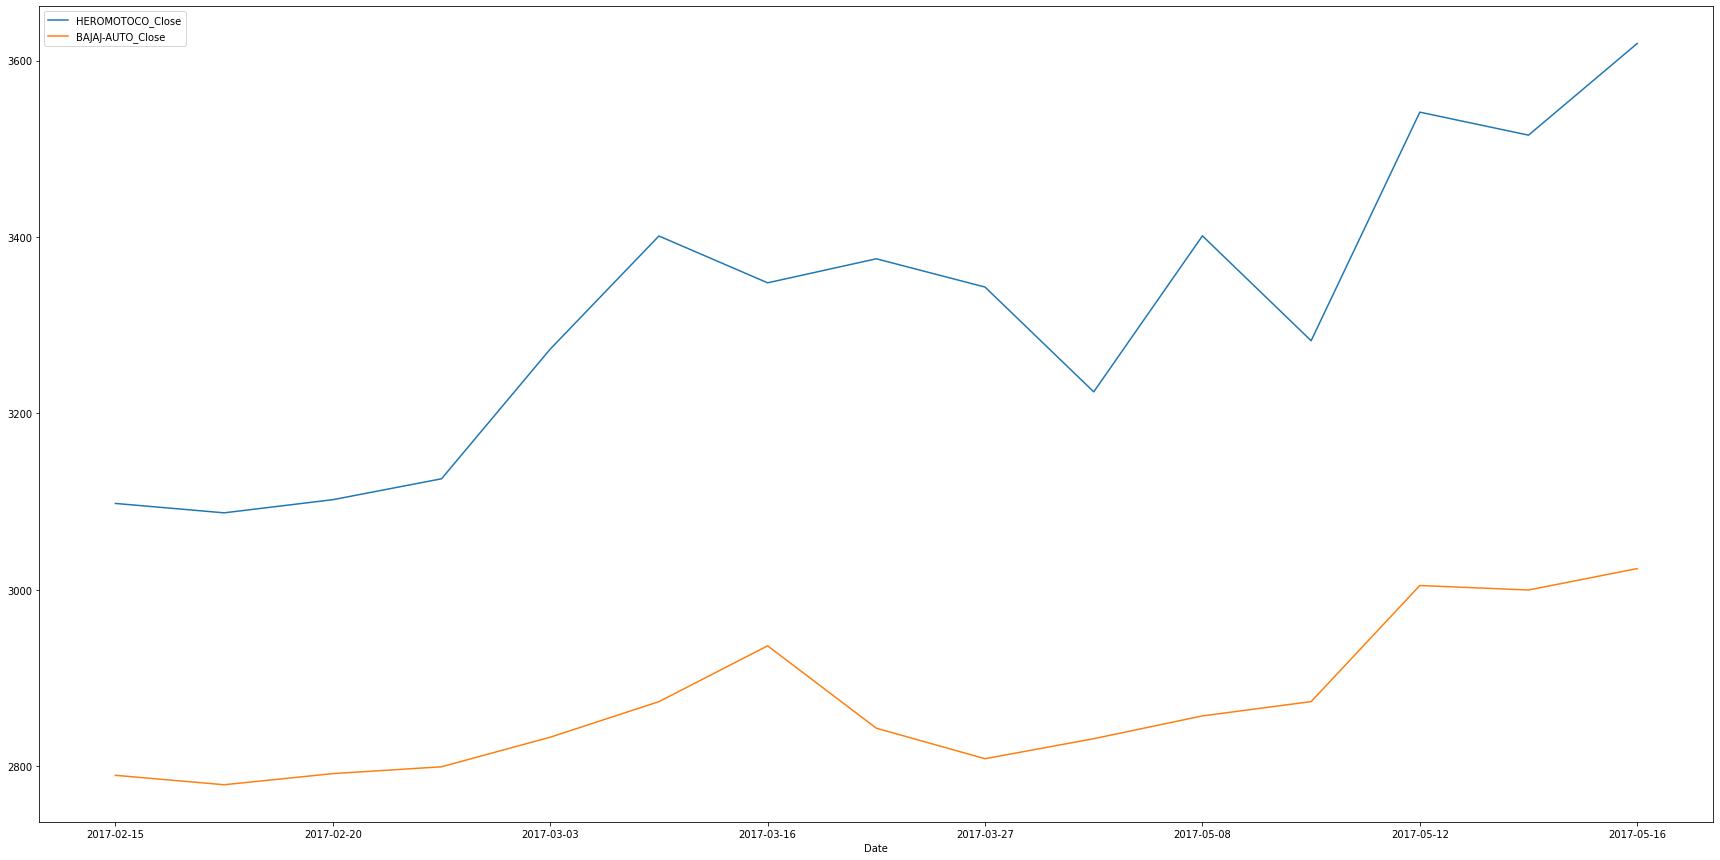

In [6]:
pair_df.plot(x='Date', y=[f'{symbol1}_Close', f'{symbol2}_Close'], figsize=(30,15))

__In the figure above:__
- __Blue line__ - Symbol 1 Close price
- __Orange line__ - Symbol 2 Close price


---

# 5. Visualizing the Spread of the pair

Text(0, 0.5, 'Price')

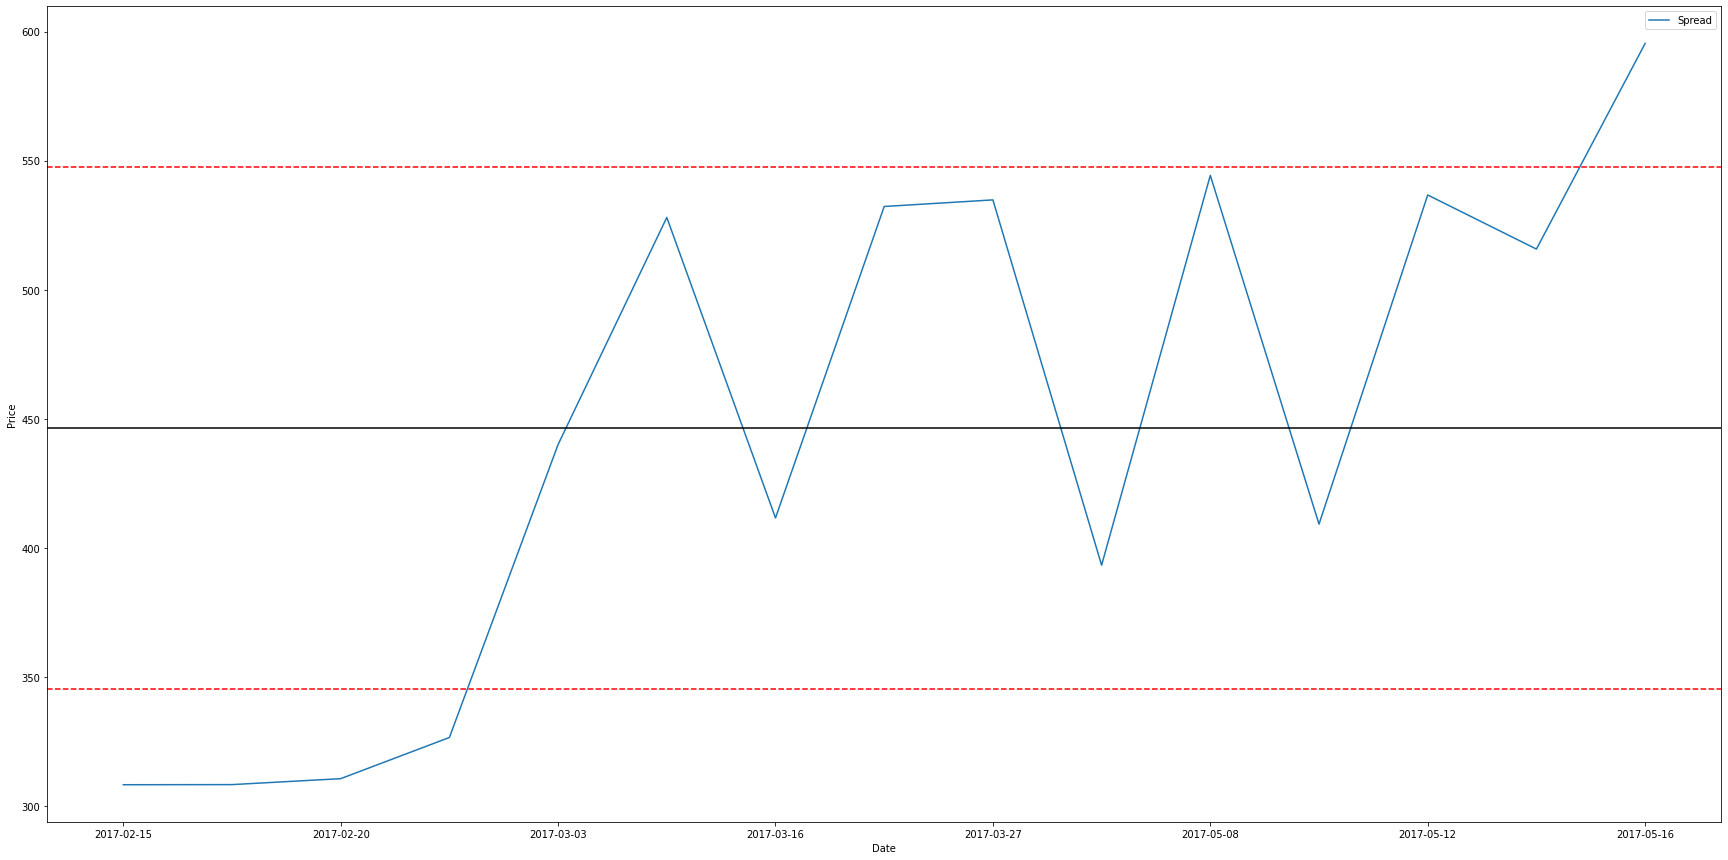

In [7]:
pair_spread_mean = pair_df['Spread'].mean()
spread_std = pair_df['Spread'].std()

pair_spread_plt = pair_df.plot(x='Date', y=['Spread'], figsize=(30,15))

pair_spread_plt.axhline(pair_spread_mean, c='black')
pair_spread_plt.axhline(pair_spread_mean + spread_std, c='red', ls = "--")
pair_spread_plt.axhline(pair_spread_mean - spread_std, c='red', ls = "--")

pair_spread_plt.set_ylabel("Price")

__In the graph above:__
- __Blue line__ is the spread.
- __Black line__ is mean price.
- __Red dotted lines__ represent 1 and 2 standard deviations above and below the mean respectively.


---

# 6. Visualizing the zscore of the spread of the pair

Text(17.200000000000017, 0.5, 'zscore')

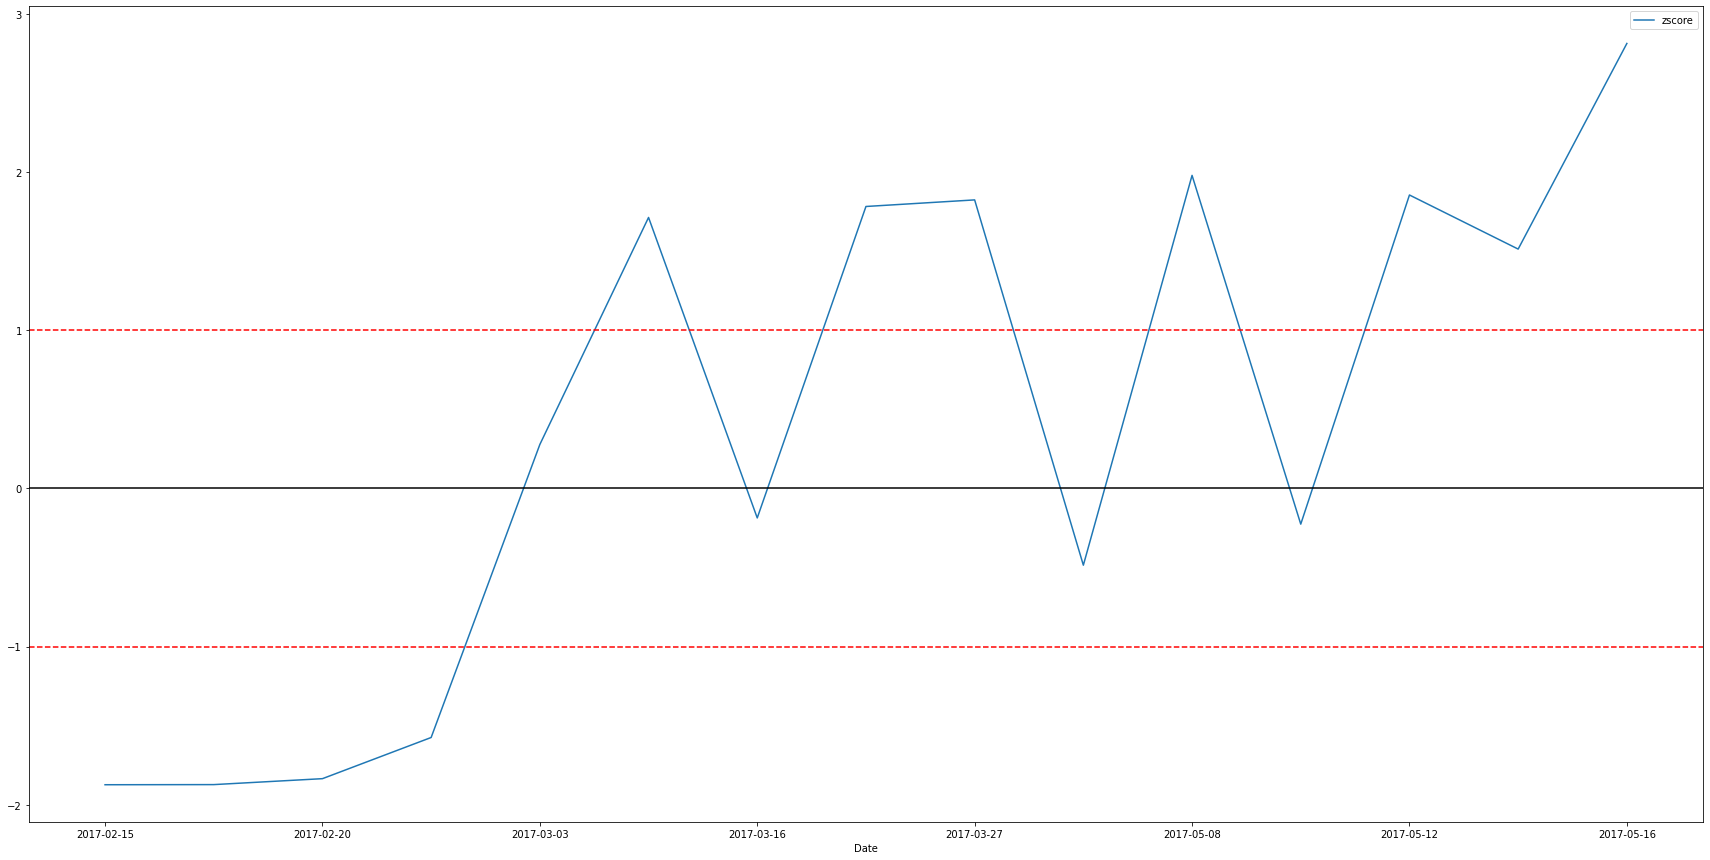

In [8]:
pair_zscore_plt = pair_df.plot(x='Date', y='zscore', figsize=(30,15))

pair_zscore_plt.axhline(0, c='black')
pair_zscore_plt.axhline(1, c='red', ls = "--")
pair_zscore_plt.axhline(-1, c='red', ls = "--")

pair_spread_plt.set_ylabel("zscore")

__In the graph above:__
- __Blue line__ is the zscore of the spread.
- __Black line__ at 0 is mean.
- __Red dotted lines__ represent 1 and 2 standard deviations above and below the mean respectively.


---

# 7. Visualizing the orders placed on the pair

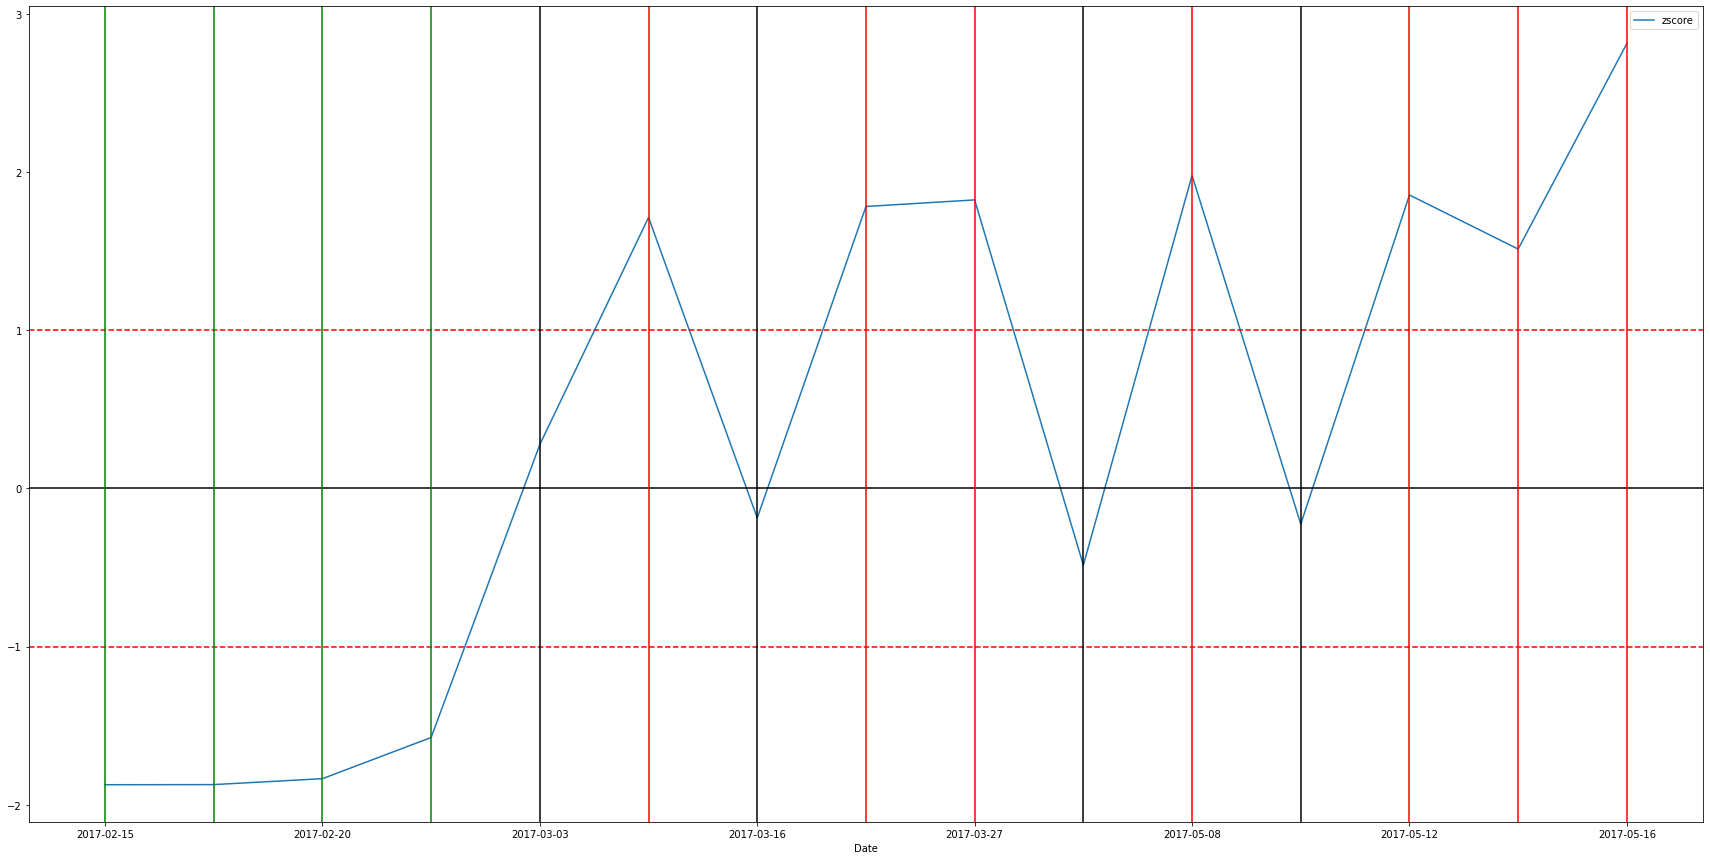

In [9]:
# Plotting the zscore of the Spread of 20 day Simple Moving Average
orders_plt = pair_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = pair_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")


__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


---

# 8. Visualization of profits of both stocks

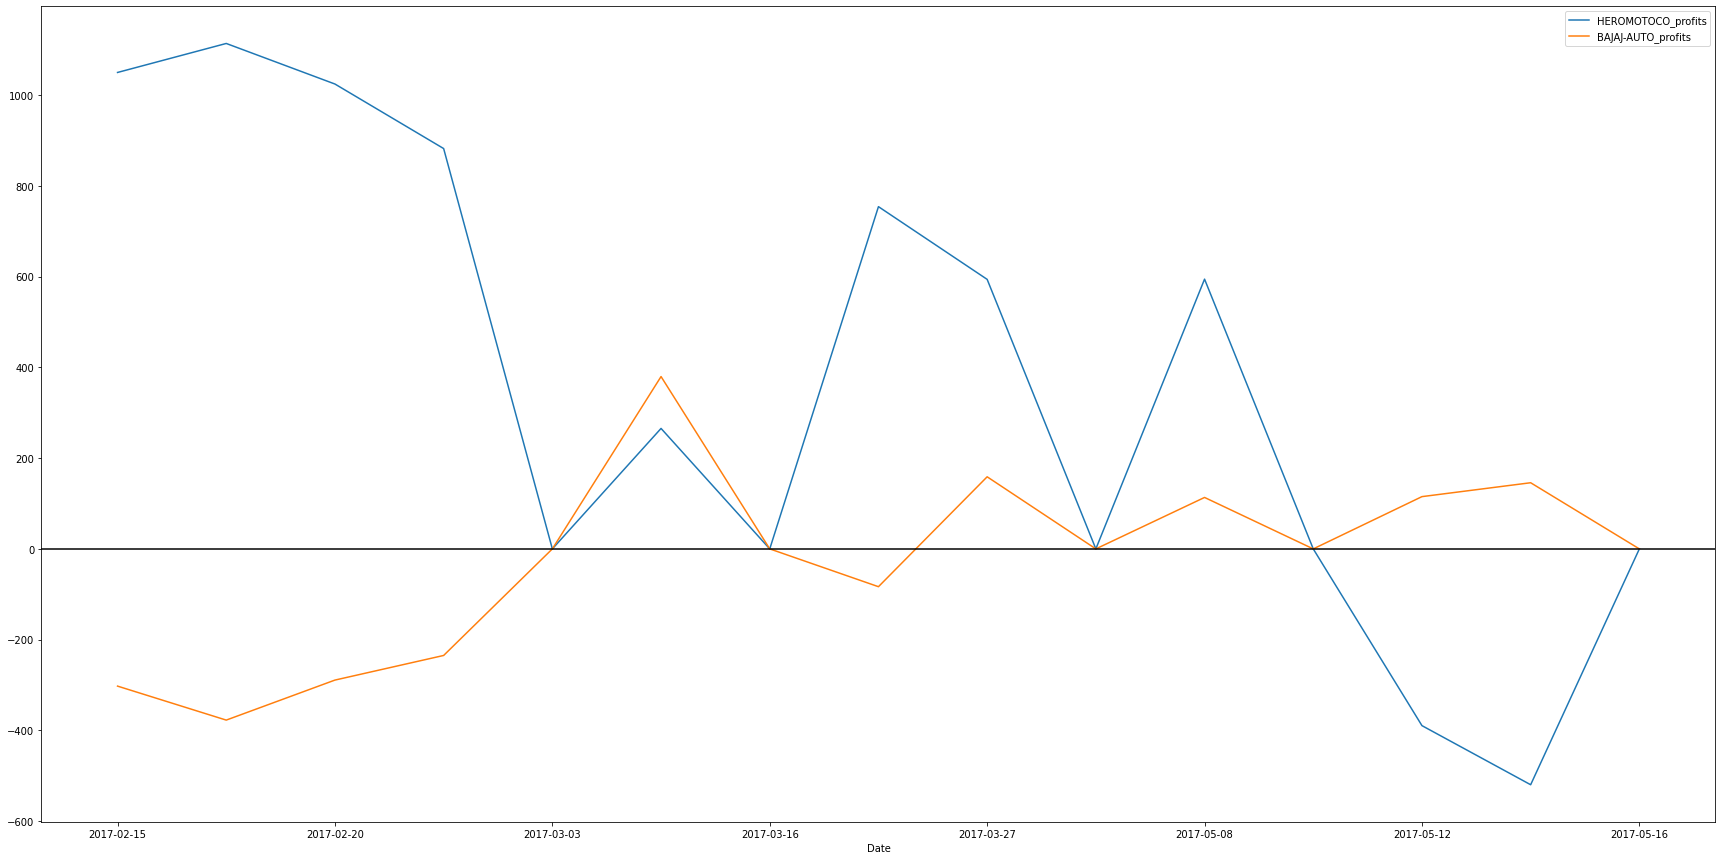

In [10]:
profits_plt = pair_df.plot(x="Date", y=[f'{symbol1}_profits', f'{symbol2}_profits',], figsize=(30,15))
profits_plt.axhline(0, c='black')

__In the figure above:__
- __Blue line__ - Symbol 1 Profits
- __Orange line__ - Symbol 2 Profits
- __Black line__ at 0 - Profit Line
- All points below black line show a loss
- All points above black line show a profit
